# Machine Learning - Onderwijsdagen

Tijdens het praktische gedeelte van deze sessie gaan we aan de slag met Jupyter notebooks. Een notebook is een gebruiksvriendelijke manier om code te schrijven in de programmeertaal Python. De indeling van de notebooks werkt als volgt:

- Elke rechthoekige "__cel__" in de notebook bevat een toelichting ("__Markdown__", net zoals deze cel) of Python-commando's ("__Code__"). Selecteer een cel door er 1 keer op te klikken.


- Door op de knop "__Run__" te klikken, wordt de huidig geselecteerde cel uitgevoerd en de volgende cel geselecteerd. Wanneer een cel commando's bevat, worden de resultaten hiervan na uitvoer onder de cel weergegeven.


Probeer op deze wijze door het notebook heen te werken. Laat je niet afschrikken door de code, in principe is alles al ingevuld. 
###### Let op: wanneer er iets fout gaat en je de notebook wilt herstarten, dien je weer bovenaan te beginnen!

Laten we starten met het importeren van de vereiste plugins. Voer de cel uit, en controleer of er een boodschap onder de cel verschijnt.

In [1]:
import os, cv2, keras
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt
%matplotlib inline
from keras import models
from keras import layers
from keras.utils import to_categorical
keras.initializers.RandomNormal(seed=42)
print("Klaar!")

Using TensorFlow backend.


Klaar!


Doel van deze notebook is het trainen van 10 __perceptrons__. Kortgezegd is een perceptron een simpel neuraal netwerk, bestaande uit een $X$ aantal __inputs__. Alle inputs zijn verbonden met een __output__. De verbindingen tussen $X$ en deze outputs, die de __gewichten__ worden genoemd, worden getraind om te zorgen dat de juiste output wordt geactiveerd wanneer de input bepaalde patronen bevat.

Tijdens dit experiment trainen we 10 perceptrons tegelijkertijd op dezelfde invoer, met als doel __automatisch handgeschreven nummers te herkennen__ ('0' tot '9'). Elke perceptron krijgt als taak om een van de getallen te herkennen; afhankelijk van hoe 'sterk' het netwerk een getal denkt te herkennen wordt de perceptron van het respectievelijke getal geactiveerd. Elke output genereert op deze manier een 'kans'-waarde, hoe hoger deze waarde, hoe zekerder het netwerk is van zijn classificatie. De output met de hoogste waarde is de classificatie van de input.

<img src="images/Perceptron2.png" alt="Perceptron visualization" style="width: 400px;"/>

>_Illustratie van de 10 perceptrons._

We gaan de perceptrons trainen op de breed toegepaste MNIST-dataset, die tienduizenden afbeeldingen van handgeschreven nummers bevat. Elke nummer bestaat uit een zwart-wit plaatje met een resolutie van 28 x 28 pixels. Ieder plaatje is van een label voorzien, en op die manier toegewezen aan een van de 10 categorieen ('0', '1', .... '9'). 

Om de plaatjes te kunnen verwerken in dit neurale netwerk, worden ze 'platgeslagen'. De afbeelding van 28 x 28 pixels wordt omgezet naar een rij van 28*28=784 getallen. De $X$-waarde van ons neurale netwerk is dus 784.

De MNIST-dataset bestaat uit zowel een training- en test-dataset. Een vuistregel voor experimenten met neurale netwerken is om een deel van de beschikbare data apart te zetten in een test-dataset, geschikt voor validatiedoeleinden. Op deze manier kunnen we de nauwkeurigheid van ons neurale netwerk bij gebruik van nieuwe data valideren. Uiteraard zijn alletwee de datasets ook van een lijst met corresponderende labels voorzien.

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('MNIST data is geimporteerd.')

MNIST data is geimporteerd.


De perceptrons worden straks getraind op de plaatjes uit de __training-dataset__, door ze samen met de __training-labels__ door het neurale netwerk te laten verwerken. 

Laten we bekijken hoe de training-dataset in elkaar zit. Als het goed is laat de code hieronder zien dat er 60.000 plaatjes in de dataset zitten, met een resolutie van 28 x 28 pixels.

In [3]:
train_images.shape

(60000, 28, 28)

Klopt helemaal! Laten we eens kijken hoe de eerste 5 plaatjes uit de dataset eruit zien.

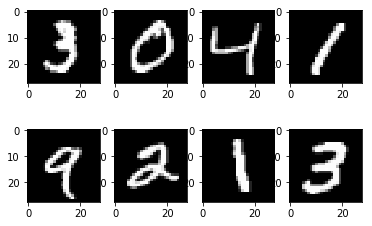

In [4]:
plt.subplot(241)
plt.imshow(train_images[10].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(242)
plt.imshow(train_images[1].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(243)
plt.imshow(train_images[2].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(244)
plt.imshow(train_images[3].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(245)
plt.imshow(train_images[4].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(246)
plt.imshow(train_images[5].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(247)
plt.imshow(train_images[6].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(248)
plt.imshow(train_images[7].reshape(28,28), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

Dat ziet er goed uit. We hebben natuurlijk ook de labels bij de plaatjes nodig. Het aantal labels zou gelijk moeten zijn aan het aantal plaatjes (60.000).

In [5]:
len(train_labels)

60000

Hoeveel unieke labels zijn er? Dit zouden er '0' tot '9' moeten zijn.

In [6]:
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


Zijn de labels (ongeveer) gebalanceerd? Klopt het dat er ongeveer evenveel plaatjes per categorie in de training-dataset zitten?

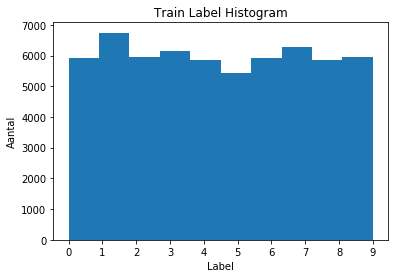

In [7]:
plt.hist(train_labels)

plt.title("Train Label Histogram")
plt.xlabel("Label")
plt.ylabel("Aantal")
plt.xticks(np.arange(10))
fig = plt.gcf()

We kunnen hetzelfde doen voor de __test-dataset__. Deze zou uit 10.000 plaatjes moeten bestaan.

In [8]:
test_images.shape

(10000, 28, 28)

Met 10 verschillende __test-labels__...

In [9]:
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]


En een (min of meer) gelijke verdeling.

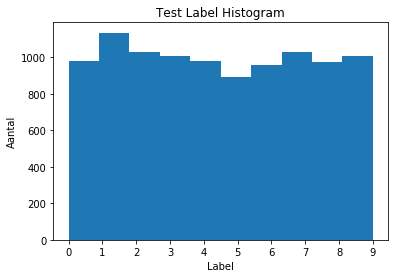

In [10]:
plt.hist(test_labels)

plt.title("Test Label Histogram")
plt.xlabel("Label")
plt.ylabel("Aantal")
plt.xticks(np.arange(10))
fig = plt.gcf()

__=====================================================================================================================__
<b><center>Stop Hier</center></b>
__=====================================================================================================================__

Ieder neuraal netwerk is opgebouwd uit __lagen__, een onderdeel dat je zou kunnen beschouwen als een filter voor de data. Er wordt data ingevoerd, deze wordt verwerkt, en vervolgens uitgevoerd in een voor het netwerk bruikbare vorm.

De lagen filteren __representaties__ uit uit de ingevoerde data -- hopenlijk representaties die ons verder kunnen helpen met ons probleem (het herkennen van hangeschreven nummers). 

Het grootste deel van deep learning bestaat uit het bouwen van neurale netwerken, die bestaan uit vele varianten van deze lagen. De netwerken voeren een soort "data-destillatie" uit, door keer op keer relevante representaties uit de data te filteren.

Laten we beginnen met het bouwen van ons eigen neurale netwerk! Ons netwerk bestaat uit:

- Een __invoerlaag__ met 28*28=784 inputs (elke pixel uit een plaatje is een input).


- Een __uitvoerlaag__ met 10 outputs, voor elk getal een ('0', '1', .... '9'). De output met de hoogste waarde is de classificatie van het netwerk.

In [11]:
network = models.Sequential()
network.add(layers.Dense(10, use_bias='true', activation='softmax', input_shape=(28 * 28,)))

print('Lagen toegevoed.')

Instructions for updating:
Colocations handled automatically by placer.
Lagen toegevoed.


De lagen zijn nu toegevoegd, maar we zijn er nog niet. Om het neurale netwerk klaar te maken voor gebruik moeten er nog 3 zaken geregeld worden, voordat het netwerk kan worden __gecompileerd__.

* De __optimizer__: dit mechanisme zorgt ervoor dat het netwerk zichzelf kan bijwerken op basis van de ingevoerde data en de loss-functie.


* Een __loss-functie__: deze zorgt ervoor dat het netwerk een idee heeft van hoe goed of slecht het scoort op de training-dataset. Op deze manier kan het netwerk zichzelf bijsturen.


* De waarden die bijgehouden gaan worden tijdens het trainen en testen. In dit geval houden we alleen rekening met de __nauwkeurigheid (accuracy)__ van het netwerk, bestaande uit het aantal plaatjes dat correct is geclassificeerd.

In [12]:
keras.optimizers.SGD(lr=0.01)

network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

print('Netwerk gecompileerd.')

Netwerk gecompileerd.


Voordat het daadwerkelijke trainen van het netwerk kan beginnen, moet de data __omgevormd__ worden naar een formaat dat het neurale netwerk verwacht. Alle plaatjes worden __"platgeslagen"__ naar een lijst van 784 cijfers.

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print('Data-verwerking afgerond.')

Data-verwerking afgerond.


Het trainen van het netwerk gaat als volgt in zijn werk. Eerst voeren we de __training dataset__ in binnen het neurale netwerk (`train_images` en de bijbehorende `train_labels`). De perceptrons in het neurale netwerk leren op die manier via de __gewichten__ een associatie aan tussen de plaatjes en de labels. Daarna passen we de __test-dataset__ op het netwerk toe, door de `test_images` in het netwerk te laten verwerken. Daarna __verifieren__ we of de voorspellingen uit het netwerk overeenkomen met de labels uit `test_labels`.

Het __trainen__ wordt gestart door de `fit`-functie van het netwerk aan te roepen. Het aantal `epochs` staat voor het aantal keer dat het netwerk door de training-dataset itereert. De `batch_size` geeft aan hoeveel plaatjes uit de dataset door het netwerk worden gebruikt om zichzelf bij te sturen. Een hogere batch size resulteert in een veel sneller neuraal netwerk, maar daardoor gaat de nauwkeurigheid ook omlaag.

>_Bonus: Experimenteer met verschillende waarden voor de batch size en epochs, om te zien op welke manier de nauwkeurigheid van het neurale netwerk wordt beinvloed._

In [14]:
network.fit(train_images, train_labels, epochs=20, batch_size=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.6642 - acc: 0.8381
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.4096 - acc: 0.8892
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.3691 - acc: 0.8984
Epoch 4/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.3483 - acc: 0.9038
Epoch 5/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.3350 - acc: 0.9070
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.3256 - acc: 0.9091
Epoch 7/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.3184 - acc: 0.9111
Epoch 8/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.3126 - acc: 0.9125
Epoch 9/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.3080 - acc: 0.9144
Epoch 10/20
60000/60000 [===========================

Tijdens het trainen worden er twee getallen weergegeven: de `loss` van het netwerk over de training-dataset, en `acc`, de nauwkeurigheid die het neurale netwerk behaald op de training data:

- De __loss__ zou zo laag mogelijk moeten zijn, deze waarde laat zien hoeveel fouten het netwerk maakt tijdens classificatie.


- De __nauwkeurigheidswaarde__ laat zien welk percentage van de training-dataset correct geclassificeerd is. Let wel op dat het daarbij alleen nog maar om de __training__ data gaat!

Om erachter te komen hoe goed de perceptrons functioneren bij nieuwe data, evalueren we de naukeurigheid op de __test__ data.

In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 14us/step
test_acc: 0.9211


__=====================================================================================================================__
<b><center>Stop hier</center></b>
__=====================================================================================================================__

Een interessante eigenschap van een perceptron (en vele andere typen neurale netwerken) die wordt toegepast op afbeeldingen, is dat we de interne staat van de perceptron na training kunnen visualiseren.

Hieronder bouwen we de percpetron opnieuw op in een matrix van 28 x 28 pixels, zodat we deze visueel als een afbeelding kunnen interpreteren.

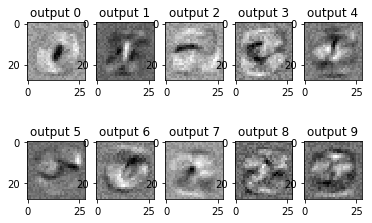

In [16]:
W1 = network.layers[0].get_weights()[0]
WW = W1.reshape(28,28,10)

plt.subplot(2,5,1)
plt.imshow(WW[:,:,0], cmap=plt.get_cmap('gray'))
plt.title('output 0')
plt.subplot(2,5,2)
plt.imshow(WW[:,:,1], cmap=plt.get_cmap('gray'))
plt.title('output 1')
plt.subplot(2,5,3)
plt.imshow(WW[:,:,2], cmap=plt.get_cmap('gray'))
plt.title('output 2')
plt.subplot(2,5,4)
plt.imshow(WW[:,:,3], cmap=plt.get_cmap('gray'))
plt.title('output 3')
plt.subplot(2,5,5)
plt.imshow(WW[:,:,4], cmap=plt.get_cmap('gray'))
plt.title('output 4')
plt.subplot(2,5,6)
plt.imshow(WW[:,:,5], cmap=plt.get_cmap('gray'))
plt.title('output 5')
plt.subplot(2,5,7)
plt.imshow(WW[:,:,6], cmap=plt.get_cmap('gray'))
plt.title('output 6')
plt.subplot(2,5,8)
plt.imshow(WW[:,:,7], cmap=plt.get_cmap('gray'))
plt.title('output 7')
plt.subplot(2,5,9)
plt.imshow(WW[:,:,8], cmap=plt.get_cmap('gray'))
plt.title('output 8')
plt.subplot(2,5,10)
plt.imshow(WW[:,:,9], cmap=plt.get_cmap('gray'))
plt.title('output 9')
# show the plot
plt.show()

>_Bonus: Wat zie je wanneer je de 10 visualisaties bekijkt? Waarom laat iedere perceptron dit specifieke patroon zien?_

# Einde sessie hier? Foto uploaden misschien te ingewikkeld

Nu het neurale netwerk getraind is, kunnen we voorspellingen gaan doen:

- Schrijf een nummer op, en maak er een foto van met je smartphone.


- Gebruik je smartphone om een vierkante uitsnede van de foto te maken.


- Upload de foto in de map waarin ook deze notebook staat.

Zodra je foto is geupload, kun je de onderstaande variabele `file` aanpassen, zodat deze dezelfde bestandsnaam heeft al de zojuist toegevoegde foto. Wanneer het niet lukt om een foto te maken kan gebruik gemaakt worden van een voorbeeldfoto -- voer dan `images/img.jpg` in als bestandsnaam:

In [17]:
file = 'bestandsnaam-hier.jpg'

print('Bestandsnaam bijgewerkt.')

Bestandsnaam bijgewerkt.


Wanneer alles goed is gegaan, kunnen we de foto visualiseren:

In [18]:
img = cv2.imread(file,0)
img = cv2.resize(img, (28, 28))
img = (255-img)
img = np.reshape(img, [1, 28 * 28])
plt.imshow(img[0].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show

error: OpenCV(4.1.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3718: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


Onze foto zou er nu min of meer hetzelfde uit moeten zien als de voorbeelden uit de train-dataset. Als laatste presenteren we de foto aan ons neurale netwerk, om een voorspelling te kunnen doen:

In [ ]:
print("Het op perceptrons gebaseerde neurale netwerk voorspelt:", (np.argmax(network.predict(img))))

Was de voorspelling juist?

__=====================================================================================================================__
<b><center>Stop Hier</center></b>
__=====================================================================================================================__

Kijk niet vreemd op wanneer het netwerk niet in staat was een juiste voorspelling te doen. De perceptrons die we tot nu toe hebben gebruikt zijn een van de simpelste vormen van neurale netwerken.

Laten we proberen om de afbeelding door een geavanceerder neuraal netwerk te halen. Om dit te doen moeten we de datasets opnieuw importeren en verwerken, een nieuw neuraal netwerk opzetten en het netwerk opnieuw trainen. Door de geavanceerde structuur van het onderstaande netwerk kan het langer duren om te trainen.

De theorie achter het type netwerk dat we nu gaan toepassen (een convolutional neural network) valt buiten de scope van deze sessie.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('test_acc:', test_acc)

Terwijl ons eerdere netwerk een nauwkeurigheidsscore van ongeveer 92% haalde, bereikt dit nieuwe netwerk een score van bijna 99% !

Nu kunnen we opnieuw een voorspelling uitvoeren.

In [ ]:
img2 = cv2.imread(file,0)
img2 = cv2.resize(img2, (28, 28))
img2 = (255-img2)
img2 = np.reshape(img2, [1, 28, 28, 1])

print("Het geavanceerde neurale netwerk voorspelt:", (np.argmax(model.predict(img2))))

Deze Jupyter notebook is gebaseerd op https://github.com/fchollet/deep-learning-with-python-notebooks.